# The code provides both time-series forecasts of future accident rates and severity levels, plus classification models to predict accident severity based on various features.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression 
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

In [2]:
df = pd.read_csv(r'Road Accident Data.csv')
df.head()

,Accident_Index,Accident Date,Month,Day_of_Week,Year,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,...,Number_of_Casualties,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200901BS70001,1/1/2021,Jan,Thursday,2021,Give way or uncontrolled,T or staggered junction,Serious,51.512273,Daylight,...,1,2,Metropolitan Police,Dry,One way street,30,15:11,Urban,Fine no high winds,Car
1,200901BS70002,1/5/2021,Jan,Monday,2021,Give way or uncontrolled,Crossroads,Serious,51.514399,Daylight,...,11,2,Metropolitan Police,Wet or damp,Single carriageway,30,10:59,Urban,Fine no high winds,Taxi/Private hire car
2,200901BS70003,1/4/2021,Jan,Sunday,2021,Give way or uncontrolled,T or staggered junction,Slight,51.486668,Daylight,...,1,2,Metropolitan Police,Dry,Single carriageway,30,14:19,Urban,Fine no high winds,Taxi/Private hire car
3,200901BS70004,1/5/2021,Jan,Monday,2021,Auto traffic signal,T or staggered junction,Serious,51.507804,Daylight,...,1,2,Metropolitan Police,Frost or ice,Single carriageway,30,8:10,Urban,Other,Motorcycle over 500cc
4,200901BS70005,1/6/2021,Jan,Tuesday,2021,Auto traffic signal,Crossroads,Serious,51.482076,Darkness - lights lit,...,1,2,Metropolitan Police,Dry,Single carriageway,30,17:25,Urban,Fine no high winds,Car


In [3]:
df.tail()

,Accident_Index,Accident Date,Month,Day_of_Week,Year,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,...,Number_of_Casualties,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
307968,201091NM01760,2/18/2022,Feb,Thursday,2022,Data missing or out of range,Not at junction or within 20 metres,Slight,57.374005,Daylight,...,2,1,Northern,Dry,Single carriageway,60,7:00,Rural,Fine no high winds,Car
307969,201091NM01881,2/21/2022,Feb,Sunday,2022,Data missing or out of range,Not at junction or within 20 metres,Slight,57.232273,Darkness - no lighting,...,1,1,Northern,Frost or ice,Single carriageway,60,3:00,Rural,Fine no high winds,Car
307970,201091NM01935,2/23/2022,Feb,Tuesday,2022,Give way or uncontrolled,T or staggered junction,Slight,57.585044,Daylight,...,1,3,Northern,Frost or ice,Single carriageway,30,9:38,Rural,Fine no high winds,Car
307971,201091NM01964,2/23/2022,Feb,Tuesday,2022,Give way or uncontrolled,T or staggered junction,Serious,57.214898,Darkness - no lighting,...,1,2,Northern,Wet or damp,Single carriageway,60,18:25,Rural,Fine no high winds,Motorcycle over 500cc
307972,201091NM02142,2/28/2022,Feb,Sunday,2022,Give way or uncontrolled,T or staggered junction,Serious,57.575210,Daylight,...,1,1,Northern,Wet or damp,Dual carriageway,60,15:45,Rural,Snowing no high winds,Car


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307973 entries, 0 to 307972
Data columns (total 23 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Accident_Index              307973 non-null  object 
 1   Accident Date               307973 non-null  object 
 2   Month                       307973 non-null  object 
 3   Day_of_Week                 307973 non-null  object 
 4   Year                        307973 non-null  int64  
 5   Junction_Control            307973 non-null  object 
 6   Junction_Detail             307973 non-null  object 
 7   Accident_Severity           307973 non-null  object 
 8   Latitude                    307973 non-null  float64
 9   Light_Conditions            307973 non-null  object 
 10  Local_Authority_(District)  307973 non-null  object 
 11  Carriageway_Hazards         5424 non-null    object 
 12  Longitude                   307973 non-null  float64
 13  Number_of_Casu

In [5]:
df.describe()

,Year,Latitude,Longitude,Number_of_Casualties,Number_of_Vehicles,Speed_limit
count,307973.000000,307973.000000,307973.000000,307973.000000,307973.000000,307973.000000
mean,2021.468934,52.487005,-1.368884,1.356882,1.829063,38.866037
std,0.499035,1.339011,1.356092,0.815857,0.710477,14.032933
min,2021.000000,49.914488,-7.516225,1.000000,1.000000,10.000000
25%,2021.000000,51.485248,-2.247937,1.000000,1.000000,30.000000
50%,2021.000000,52.225943,-1.349258,1.000000,2.000000,30.000000
75%,2022.000000,53.415517,-0.206810,1.000000,2.000000,50.000000
max,2022.000000,60.598055,1.759398,48.000000,32.000000,70.000000


In [6]:
df.columns

Index(['Accident_Index', 'Accident Date', 'Month', 'Day_of_Week', 'Year',
       'Junction_Control', 'Junction_Detail', 'Accident_Severity', 'Latitude',
       'Light_Conditions', 'Local_Authority_(District)', 'Carriageway_Hazards',
       'Longitude', 'Number_of_Casualties', 'Number_of_Vehicles',
       'Police_Force', 'Road_Surface_Conditions', 'Road_Type', 'Speed_limit',
       'Time', 'Urban_or_Rural_Area', 'Weather_Conditions', 'Vehicle_Type'],
      dtype='object')

In [7]:
df.shape

(307973, 23)

# EDA (Data Cleaning)


In [8]:
print("\nCleaning data...")
columns_to_drop = ['Accident_Index', 'Carriageway_Hazards']
df.drop(columns_to_drop, axis=1, inplace=True)


Cleaning data...


In [9]:
df.duplicated().sum()

5

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.isnull().sum().sort_index(ascending=False)

Year                             0
Weather_Conditions            6057
Vehicle_Type                     0
Urban_or_Rural_Area              0
Time                            17
Speed_limit                      0
Road_Type                     1534
Road_Surface_Conditions        317
Police_Force                     0
Number_of_Vehicles               0
Number_of_Casualties             0
Month                            0
Longitude                        0
Local_Authority_(District)       0
Light_Conditions                 0
Latitude                         0
Junction_Detail                  0
Junction_Control                 0
Day_of_Week                      0
Accident_Severity                0
Accident Date                    0
dtype: int64

# Replacing missing values with most frequent data

In [12]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
df['Road_Surface_Conditions'] = imputer.fit_transform(df[['Road_Surface_Conditions']]).ravel()
df['Weather_Conditions'] = imputer.fit_transform(df[['Weather_Conditions']]).ravel()
df['Time'] = imputer.fit_transform(df[['Time']]).ravel()
df['Road_Type'] = imputer.fit_transform(df[['Road_Type']]).ravel()


In [13]:
df.isnull().sum().sort_index(ascending=False)

Year                          0
Weather_Conditions            0
Vehicle_Type                  0
Urban_or_Rural_Area           0
Time                          0
Speed_limit                   0
Road_Type                     0
Road_Surface_Conditions       0
Police_Force                  0
Number_of_Vehicles            0
Number_of_Casualties          0
Month                         0
Longitude                     0
Local_Authority_(District)    0
Light_Conditions              0
Latitude                      0
Junction_Detail               0
Junction_Control              0
Day_of_Week                   0
Accident_Severity             0
Accident Date                 0
dtype: int64

In [14]:
df.columns

Index(['Accident Date', 'Month', 'Day_of_Week', 'Year', 'Junction_Control',
       'Junction_Detail', 'Accident_Severity', 'Latitude', 'Light_Conditions',
       'Local_Authority_(District)', 'Longitude', 'Number_of_Casualties',
       'Number_of_Vehicles', 'Police_Force', 'Road_Surface_Conditions',
       'Road_Type', 'Speed_limit', 'Time', 'Urban_or_Rural_Area',
       'Weather_Conditions', 'Vehicle_Type'],
      dtype='object')

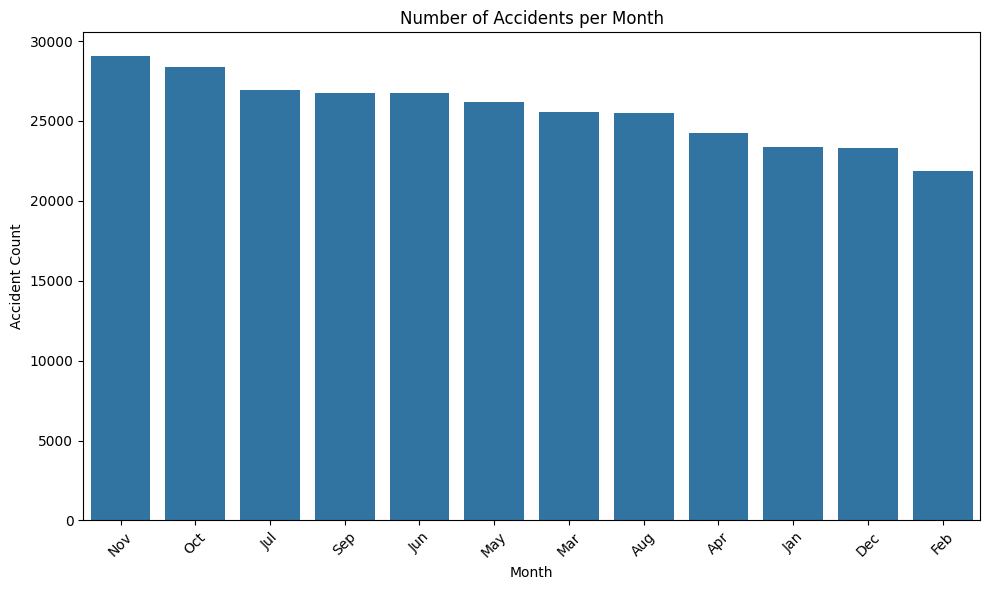

In [15]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Month', order=df['Month'].value_counts().index)
plt.title('Number of Accidents per Month')
plt.xlabel('Month')
plt.ylabel('Accident Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


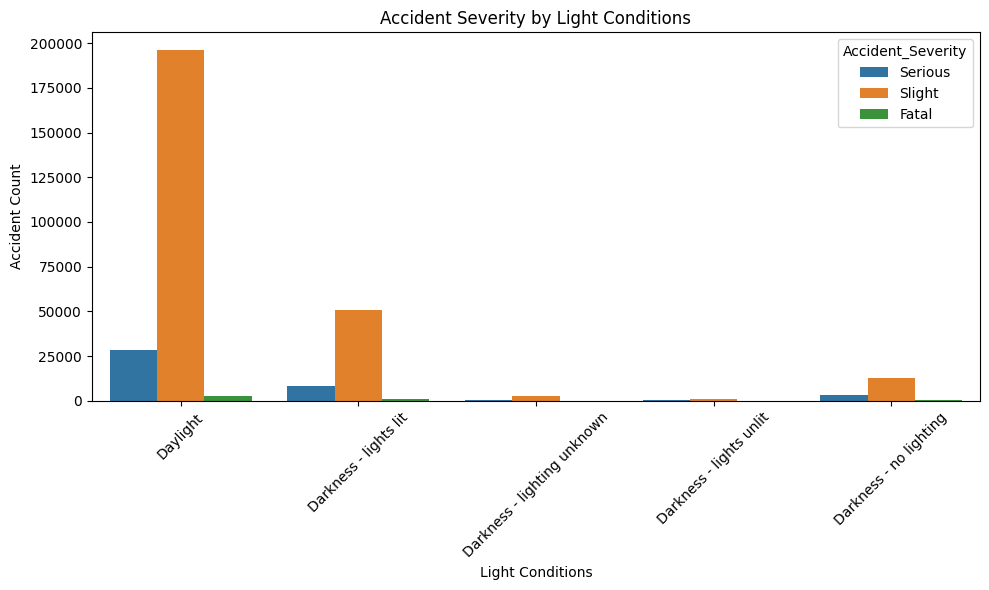

In [16]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Light_Conditions', hue='Accident_Severity')
plt.title('Accident Severity by Light Conditions')
plt.xlabel('Light Conditions')
plt.ylabel('Accident Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


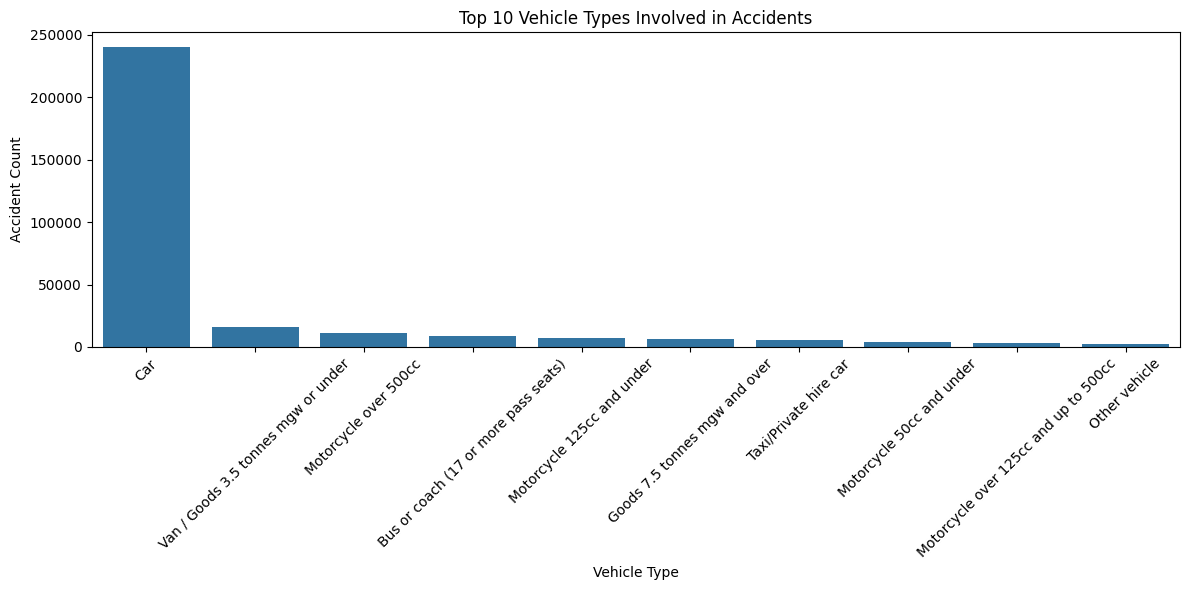

In [17]:
plt.figure(figsize=(12,6))
top_vehicles = df['Vehicle_Type'].value_counts().iloc[:10].index
sns.countplot(data=df, x='Vehicle_Type', order=top_vehicles)
plt.title('Top 10 Vehicle Types Involved in Accidents')
plt.xlabel('Vehicle Type')
plt.ylabel('Accident Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


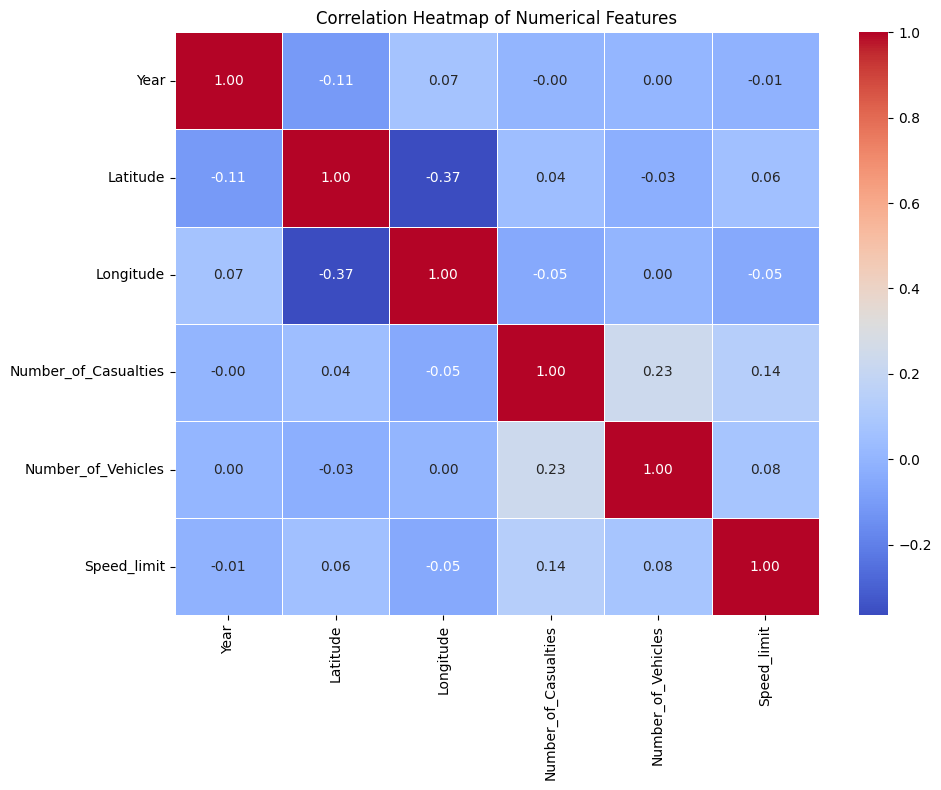

In [18]:

numeric_cols = df.select_dtypes(include=['int64', 'float64'])
corr_matrix = numeric_cols.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()


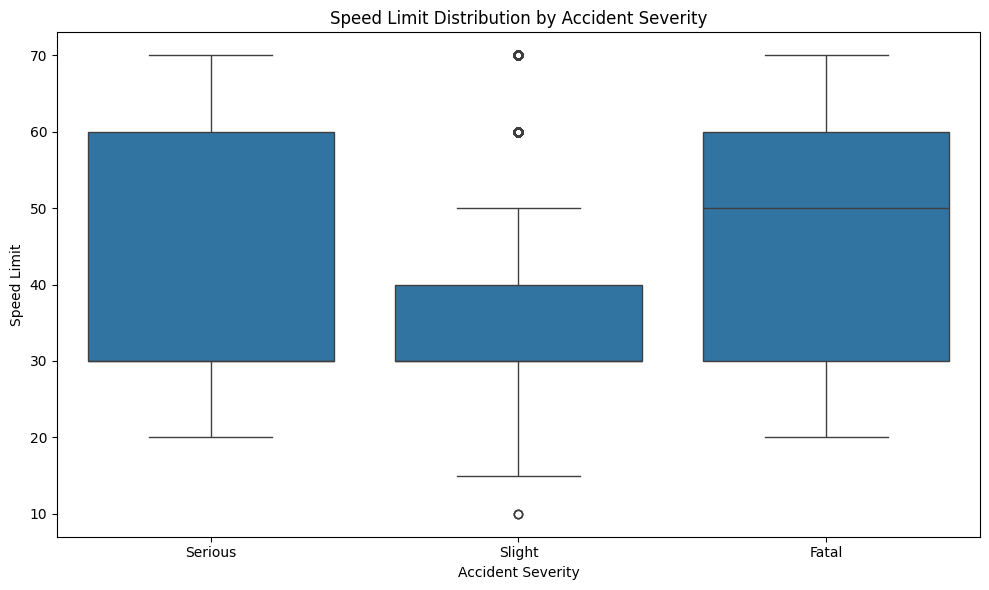

In [19]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Accident_Severity', y='Speed_limit')
plt.title('Speed Limit Distribution by Accident Severity')
plt.xlabel('Accident Severity')
plt.ylabel('Speed Limit')
plt.tight_layout()
plt.show()


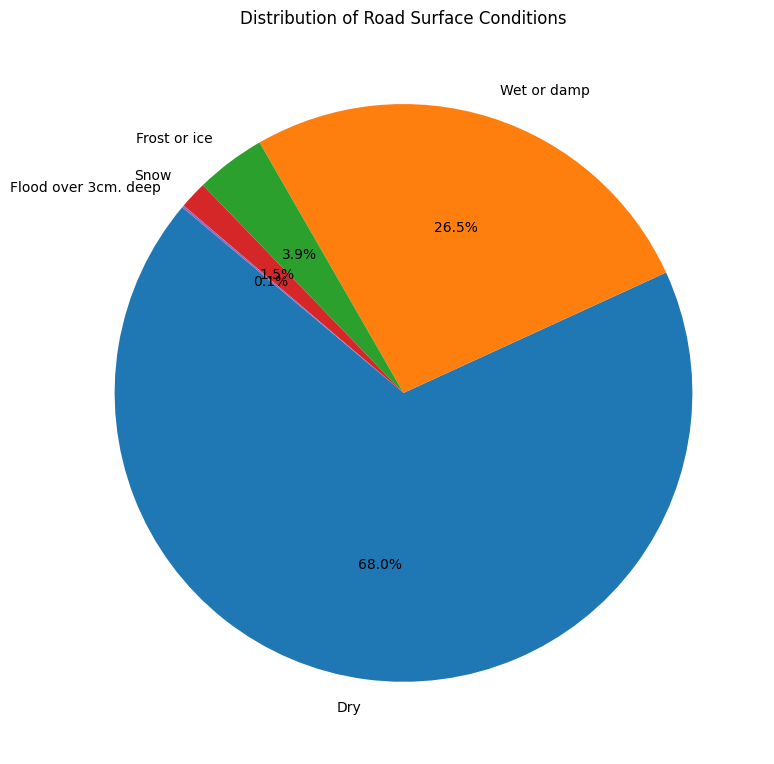

In [20]:
road_surface_counts = df['Road_Surface_Conditions'].value_counts()
plt.figure(figsize=(8,8))
plt.pie(road_surface_counts, labels=road_surface_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Road Surface Conditions')
plt.tight_layout()
plt.show()


# Feature engineering


In [21]:
print("\nCreating new features...")
df['Hour'] = pd.to_datetime(df['Time']).dt.hour
df['Is_Night'] = df['Hour'].apply(lambda x: 1 if x < 6 or x > 18 else 0)
df['Bad_Weather'] = df['Weather_Conditions'].apply(lambda x: 1 if x in ['Rain', 'Snow', 'Fog'] else 0)


Creating new features...


C:\Users\OO7\AppData\Local\Temp\ipykernel_35312\3305341213.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Hour'] = pd.to_datetime(df['Time']).dt.hour


In [22]:
print("Columns in DataFrame:", df.columns.tolist())

Columns in DataFrame: ['Accident Date', 'Month', 'Day_of_Week', 'Year', 'Junction_Control', 'Junction_Detail', 'Accident_Severity', 'Latitude', 'Light_Conditions', 'Local_Authority_(District)', 'Longitude', 'Number_of_Casualties', 'Number_of_Vehicles', 'Police_Force', 'Road_Surface_Conditions', 'Road_Type', 'Speed_limit', 'Time', 'Urban_or_Rural_Area', 'Weather_Conditions', 'Vehicle_Type', 'Hour', 'Is_Night', 'Bad_Weather']


In [23]:
# Convert accident date to datetime
print("\nProcessing dates...")
df['Accident Date'] = pd.to_datetime(df['Accident Date'])


Processing dates...


In [24]:
# Time Series Analysis
print("\nPerforming time series analysis...")
monthly_accidents = df.resample('M', on='Accident Date').size()
severity_trends = df.groupby([pd.Grouper(key='Accident Date', freq='M'), 'Accident_Severity']).size().unstack()


Performing time series analysis...


C:\Users\OO7\AppData\Local\Temp\ipykernel_35312\1694662461.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_accidents = df.resample('M', on='Accident Date').size()
C:\Users\OO7\AppData\Local\Temp\ipykernel_35312\1694662461.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  severity_trends = df.groupby([pd.Grouper(key='Accident Date', freq='M'), 'Accident_Severity']).size().unstack()


In [25]:
# ARIMA Modeling for accident prediction
print("\nBuilding ARIMA model...")
model = ARIMA(monthly_accidents, order=(5,1,0), seasonal_order=(1,1,1,12))
model_fit = model.fit()


Building ARIMA model...


NameError: name 'ARIMA' is not defined

In [ ]:
# 5-month forecast
forecast_steps = 5
forecast = model_fit.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(monthly_accidents.index[-1], periods=forecast_steps+1, freq='M')[1:]
forecast_values = forecast.predicted_mean
conf_int = forecast.conf_int()

In [ ]:
# Severity level forecasting
severity_forecasts = {}
for severity in severity_trends.columns:
    model_sev = ARIMA(severity_trends[severity].fillna(0), order=(3,1,1))
    model_fit_sev = model_sev.fit()
    severity_forecasts[severity] = model_fit_sev.get_forecast(steps=5).predicted_mean

forecast_severity = pd.DataFrame(severity_forecasts, index=forecast_index)

In [ ]:
# Visualization
print("\nGenerating visualizations...")
plt.figure(figsize=(15, 10))
plt.subplot(2, 1, 1)
plt.plot(monthly_accidents.index, monthly_accidents, label='Historical Data')
plt.plot(forecast_index, forecast_values, color='red', label='Forecast')
plt.fill_between(forecast_index, conf_int.iloc[:,0], conf_int.iloc[:,1], color='pink', alpha=0.3)
plt.title('5-Month Accident Forecast')
plt.ylabel('Number of Accidents')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
forecast_severity.plot(kind='area', stacked=True, ax=plt.gca())
plt.title('Predicted Accident Severity Distribution')
plt.ylabel('Number of Accidents')
plt.xlabel('Date')
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
# Print forecast summary
print("\nForecast Summary:")
print("1. Total Accident Forecast:")
for i, (date, value) in enumerate(zip(forecast_index, forecast_values), 1):
    print(f"   Month {i}: {date.strftime('%Y-%m')} - {value:.0f} ±{((conf_int.iloc[i-1,1]-conf_int.iloc[i-1,0])/2):.0f} accidents")

print("\n2. Severity Distribution Forecast:")
print(forecast_severity.round().astype(int))

# Determining which column to encode

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 307968 entries, 0 to 307972
Data columns (total 20 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Month                       307968 non-null  object 
 1   Day_of_Week                 307968 non-null  object 
 2   Year                        307968 non-null  int64  
 3   Junction_Control            307968 non-null  object 
 4   Junction_Detail             307968 non-null  object 
 5   Accident_Severity           307968 non-null  object 
 6   Latitude                    307968 non-null  float64
 7   Light_Conditions            307968 non-null  object 
 8   Local_Authority_(District)  307968 non-null  object 
 9   Longitude                   307968 non-null  float64
 10  Number_of_Casualties        307968 non-null  int64  
 11  Number_of_Vehicles          307968 non-null  int64  
 12  Police_Force                307968 non-null  object 
 13  Road_Surface_Condit

In [ ]:
for col in ['Month', 'Day_of_Week', 'Junction_Control', 'Junction_Detail',
       'Accident_Severity', 'Light_Conditions',
       'Local_Authority_(District)',
        'Police_Force', 'Road_Surface_Conditions',
       'Road_Type', 'Time', 'Urban_or_Rural_Area',
       'Weather_Conditions', 'Vehicle_Type']:
    print(f"Unique values in {col}: {df[col].unique()}")
    print(f"number of unique values in {col}: {df[col].nunique()}")
    print("\n")

Unique values in Month: ['Jan' 'Feb' 'Mar' 'Apr' 'May' 'Jun' 'Aug' 'Jul' 'Sep' 'Oct' 'Nov' 'Dec']
number of unique values in Month: 12


Unique values in Day_of_Week: ['Thursday' 'Monday' 'Sunday' 'Tuesday' 'Friday' 'Wednesday' 'Saturday']
number of unique values in Day_of_Week: 7


Unique values in Junction_Control: ['Give way or uncontrolled' 'Auto traffic signal'
 'Data missing or out of range' 'Authorised person' 'Stop sign'
 'Not at junction or within 20 metres']
number of unique values in Junction_Control: 6


Unique values in Junction_Detail: ['T or staggered junction' 'Crossroads'
 'Not at junction or within 20 metres' 'Roundabout' 'Mini-roundabout'
 'More than 4 arms (not roundabout)' 'Private drive or entrance'
 'Slip road' 'Other junction']
number of unique values in Junction_Detail: 9


Unique values in Accident_Severity: ['Serious' 'Slight' 'Fatal']
number of unique values in Accident_Severity: 3


Unique values in Light_Conditions: ['Daylight' 'Darkness - lights lit' 'Dar

# Encoding

In [ ]:
LE = LabelEncoder()
for col in ['Month', 'Day_of_Week', 'Junction_Control', 'Junction_Detail',
       'Accident_Severity', 'Light_Conditions',
       'Local_Authority_(District)',
        'Police_Force', 'Road_Surface_Conditions',
       'Road_Type', 'Time', 'Urban_or_Rural_Area',
       'Weather_Conditions', 'Vehicle_Type']:
    df[col] = LE.fit_transform(df[col])

In [ ]:
df.head()

,Month,Day_of_Week,Year,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,Local_Authority_(District),Longitude,Number_of_Casualties,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,4,4,2021,3,8,1,51.512273,4,185,-0.201349,1,2,29,0,1,30,370,1,1,2
1,4,1,2021,3,0,1,51.514399,4,185,-0.199248,11,2,29,4,3,30,118,1,1,13
2,4,3,2021,3,8,2,51.486668,4,185,-0.179599,1,2,29,0,3,30,318,1,1,13
3,4,1,2021,1,8,1,51.507804,4,185,-0.203110,1,2,29,2,3,30,1329,1,3,9
4,4,5,2021,1,0,1,51.482076,1,185,-0.173445,1,2,29,0,3,30,504,1,1,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 307968 entries, 0 to 307972
Data columns (total 20 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Month                       307968 non-null  int32  
 1   Day_of_Week                 307968 non-null  int32  
 2   Year                        307968 non-null  int64  
 3   Junction_Control            307968 non-null  int32  
 4   Junction_Detail             307968 non-null  int32  
 5   Accident_Severity           307968 non-null  int32  
 6   Latitude                    307968 non-null  float64
 7   Light_Conditions            307968 non-null  int32  
 8   Local_Authority_(District)  307968 non-null  int32  
 9   Longitude                   307968 non-null  float64
 10  Number_of_Casualties        307968 non-null  int64  
 11  Number_of_Vehicles          307968 non-null  int64  
 12  Police_Force                307968 non-null  int32  
 13  Road_Surface_Condit

# putting target in the end

In [ ]:
Accident_Severity = df['Accident_Severity']
df.drop(['Accident_Severity'], axis=1, inplace=True)
df['Accident_Severity'] = Accident_Severity
df.head()

,Month,Day_of_Week,Year,Junction_Control,Junction_Detail,Latitude,Light_Conditions,Local_Authority_(District),Longitude,Number_of_Casualties,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Accident_Severity
0,4,4,2021,3,8,51.512273,4,185,-0.201349,1,2,29,0,1,30,370,1,1,2,1
1,4,1,2021,3,0,51.514399,4,185,-0.199248,11,2,29,4,3,30,118,1,1,13,1
2,4,3,2021,3,8,51.486668,4,185,-0.179599,1,2,29,0,3,30,318,1,1,13,2
3,4,1,2021,1,8,51.507804,4,185,-0.203110,1,2,29,2,3,30,1329,1,3,9,1
4,4,5,2021,1,0,51.482076,1,185,-0.173445,1,2,29,0,3,30,504,1,1,2,1


# spliting

In [ ]:
X = df.drop('Accident_Severity', axis=1)
y = df['Accident_Severity']

In [ ]:
X.shape, y.shape

((307968, 19), (307968,))

In [ ]:
X.head()

,Month,Day_of_Week,Year,Junction_Control,Junction_Detail,Latitude,Light_Conditions,Local_Authority_(District),Longitude,Number_of_Casualties,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,4,4,2021,3,8,51.512273,4,185,-0.201349,1,2,29,0,1,30,370,1,1,2
1,4,1,2021,3,0,51.514399,4,185,-0.199248,11,2,29,4,3,30,118,1,1,13
2,4,3,2021,3,8,51.486668,4,185,-0.179599,1,2,29,0,3,30,318,1,1,13
3,4,1,2021,1,8,51.507804,4,185,-0.203110,1,2,29,2,3,30,1329,1,3,9
4,4,5,2021,1,0,51.482076,1,185,-0.173445,1,2,29,0,3,30,504,1,1,2


In [ ]:
y.head()

0    1
1    1
2    2
3    1
4    1
Name: Accident_Severity, dtype: int32

# Outlier

In [ ]:
def outliers(df, column):
    Q1 = df[column].quantile(0.25)      
    Q3 = df[column].quantile(0.75)       
    IQR = Q3 - Q1                        
    outlier_indices = df[
        (df[column] < (Q1 - 1.5 * IQR)) | 
        (df[column] > (Q3 + 1.5 * IQR))
    ].index                              
    return outlier_indices

In [ ]:
numeric_cols = ['Month', 'Day_of_Week', 'Junction_Control', 'Junction_Detail',
       'Accident_Severity', 'Light_Conditions',
       'Local_Authority_(District)',
        'Police_Force', 'Road_Surface_Conditions',
       'Road_Type', 'Time', 'Urban_or_Rural_Area',
       'Weather_Conditions', 'Vehicle_Type']
for col in numeric_cols:
    outlier_idx = outliers(df, col)
    print(f"{col} => outlier_idx : {len(outlier_idx)}")


Month => outlier_idx : 0
Day_of_Week => outlier_idx : 0
Junction_Control => outlier_idx : 2145
Junction_Detail => outlier_idx : 0
Accident_Severity => outlier_idx : 44693
Light_Conditions => outlier_idx : 63017
Local_Authority_(District) => outlier_idx : 0
Police_Force => outlier_idx : 0
Road_Surface_Conditions => outlier_idx : 0
Road_Type => outlier_idx : 75826
Time => outlier_idx : 0
Urban_or_Rural_Area => outlier_idx : 0
Weather_Conditions => outlier_idx : 57419
Vehicle_Type => outlier_idx : 68179


C:\Users\OO7\AppData\Local\Temp\ipykernel_22700\367054228.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=outlier_df, x='Feature', y='Outlier Count', palette='Reds_r')


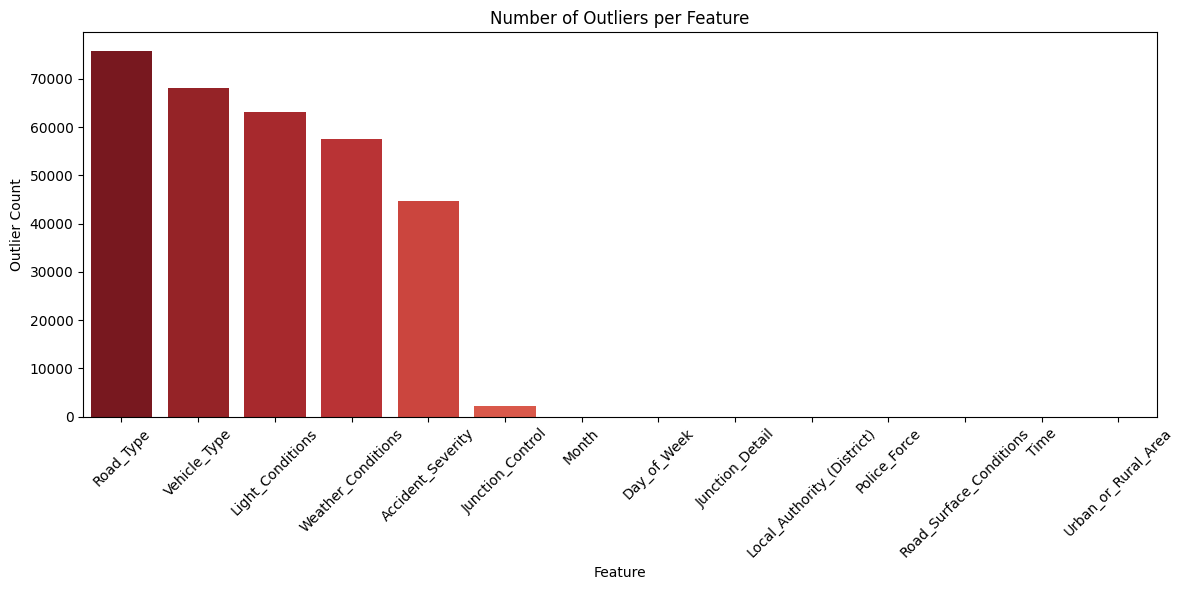

In [ ]:
outlier_counts = {
    'Junction_Control': 2145,
    'Accident_Severity': 44693,
    'Light_Conditions': 63017,
    'Road_Type': 75826,
    'Weather_Conditions': 57419,
    'Vehicle_Type': 68179
}
import pandas as pd
outlier_df = pd.DataFrame(list(outlier_counts.items()), columns=['Feature', 'Outlier Count'])
outlier_df = outlier_df.sort_values(by='Outlier Count', ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(data=outlier_df, x='Feature', y='Outlier Count', palette='Reds_r')
plt.title('Number of Outliers per Feature')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


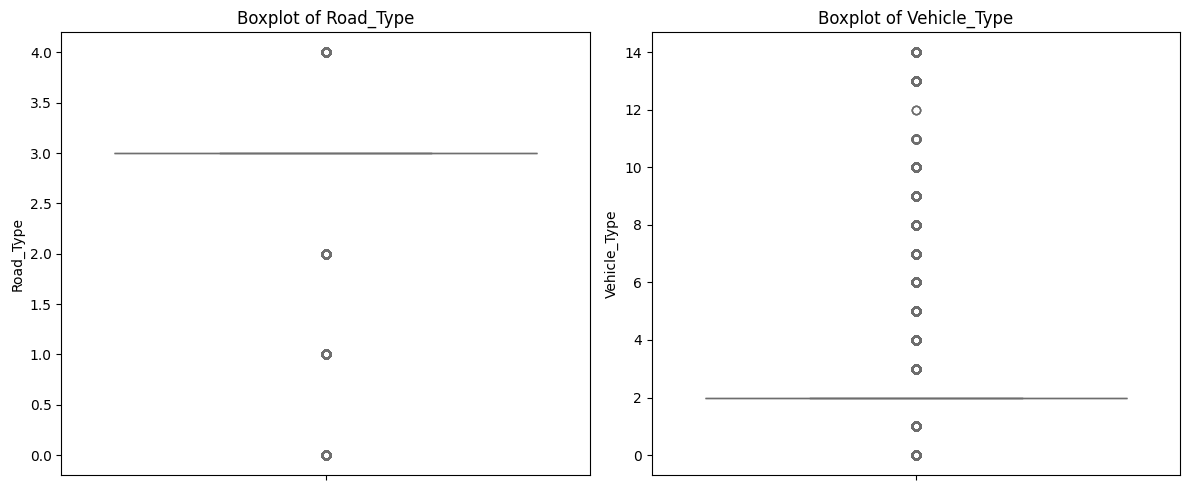

In [ ]:

df_numeric = df.copy()
df_numeric['Vehicle_Type'] = df_numeric['Vehicle_Type'].astype('category').cat.codes
df_numeric['Road_Type'] = df_numeric['Road_Type'].astype('category').cat.codes
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(y=df_numeric['Road_Type'], color='skyblue')
plt.title('Boxplot of Road_Type')
plt.subplot(1,2,2)
sns.boxplot(y=df_numeric['Vehicle_Type'], color='salmon')
plt.title('Boxplot of Vehicle_Type')
plt.tight_layout()
plt.show()


In [ ]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

In [ ]:
cols_with_outliers = ['Junction_Control', 'Accident_Severity',
                      'Light_Conditions', 'Road_Type', 'Weather_Conditions', 'Vehicle_Type','Road_Surface_Conditions']

for col in cols_with_outliers:
    df = remove_outliers(df, col)


In [ ]:
numeric_cols = ['Month', 'Day_of_Week', 'Junction_Control', 'Junction_Detail',
       'Accident_Severity', 'Light_Conditions',
       'Local_Authority_(District)',
        'Police_Force', 'Road_Surface_Conditions',
       'Road_Type', 'Time', 'Urban_or_Rural_Area',
       'Weather_Conditions', 'Vehicle_Type']
for col in numeric_cols:
    outlier_idx = outliers(df, col)
    print(f"{col} => outlier_idx : {len(outlier_idx)}")

Month => outlier_idx : 0
Day_of_Week => outlier_idx : 0
Junction_Control => outlier_idx : 0
Junction_Detail => outlier_idx : 0
Accident_Severity => outlier_idx : 0
Light_Conditions => outlier_idx : 3015
Local_Authority_(District) => outlier_idx : 0
Police_Force => outlier_idx : 0
Road_Surface_Conditions => outlier_idx : 0
Road_Type => outlier_idx : 0
Time => outlier_idx : 16055
Urban_or_Rural_Area => outlier_idx : 0
Weather_Conditions => outlier_idx : 0
Vehicle_Type => outlier_idx : 0


# Scaling

In [ ]:
# 1. First ensure all features are numeric
print("Checking data types before normalization:")
print(X.dtypes)  # If X is numpy array, check df.dtypes before splitting

# 2. Convert time strings to numerical features (if present)
if 'Time' in df.columns:
    df['Hour'] = pd.to_datetime(df['Time']).dt.hour
    df['Minute'] = pd.to_datetime(df['Time']).dt.minute
    df.drop('Time', axis=1, inplace=True)

# 3. Ensure all categorical columns are label encoded
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
if len(categorical_cols) > 0:
    print("\nLabel encoding categorical columns:", list(categorical_cols))
    le = LabelEncoder()
    for col in categorical_cols:
        X[col] = le.fit_transform(X[col])

# 4. Now normalize
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)
X.min(), X.max()

(0.0, 1.0)

# Spliting

In [ ]:
X_train, X_test, y_train, y_test =train_test_split(X,y, test_size= 0.20, random_state=100, stratify=y)

In [ ]:
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)   
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (246374, 19)
X_test shape:  (61594, 19)
y_train shape:  (246374,)
y_test shape:  (61594,)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tqdm import tqdm

Models = {'LogisticRegression': LogisticRegression(),'GaussianNB': GaussianNB(),
    #'KNeighborsClassifier': KNeighborsClassifier(),
    #'RandomForestClassifier': RandomForestClassifier(n_estimators=50,max_depth=15,max_samples=0.5,n_jobs=-1,random_state=42),
    #'SVC': SVC(),
    #'DecisionTreeClassifier': DecisionTreeClassifier()
    }

In [ ]:
ModelName = []
ModelAccuracy = []

for nameModel, model in tqdm(Models.items()):
    model.fit(X_train, y_train)
    ModelName.append(nameModel)
    y_pred = model.predict(X_test)
    ModelAccuracy.append([
        accuracy_score(y_test, y_pred),
        precision_score(y_test, y_pred, average='weighted'),
        recall_score(y_test, y_pred, average='weighted'),
        f1_score(y_test, y_pred, average='weighted')
    ])

Model_accuracy = pd.DataFrame(ModelAccuracy, index=ModelName, columns=['Accuracy', 'Precision', 'Recall', 'F1 Score'])
Model_accuracy

  0%|          | 0/2 [00:00<?, ?it/s]c:\Users\OO7\anaconda3\envs\tf_env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\OO7\anaconda3\envs\tf_env\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
100%|██████████| 2/2 [00:04<00:00,  2.43s/it]


,Accuracy,Precision,Recall,F1 Score
LogisticRegression,0.854759,0.766108,0.854759,0.788054
GaussianNB,0.835503,0.765599,0.835503,0.785833


In [ ]:
#print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))

0 = Severe

1 = Serious

2 = Slight

<Figure size 800x600 with 0 Axes>

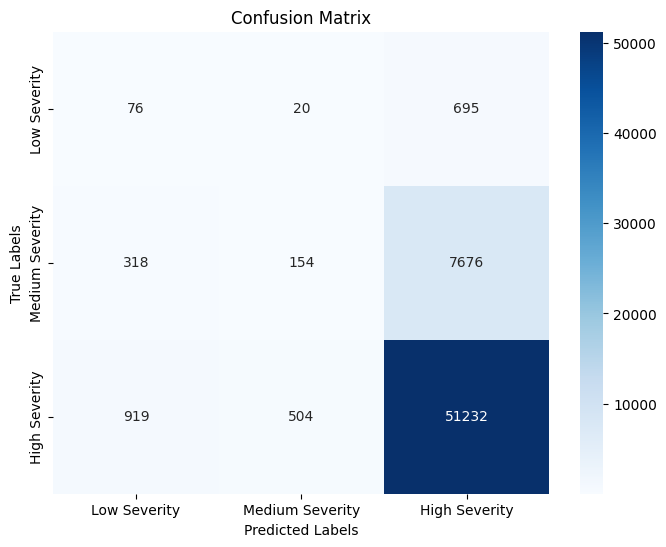

In [ ]:
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
labels = ['Low Severity', 'Medium Severity', 'High Severity']
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

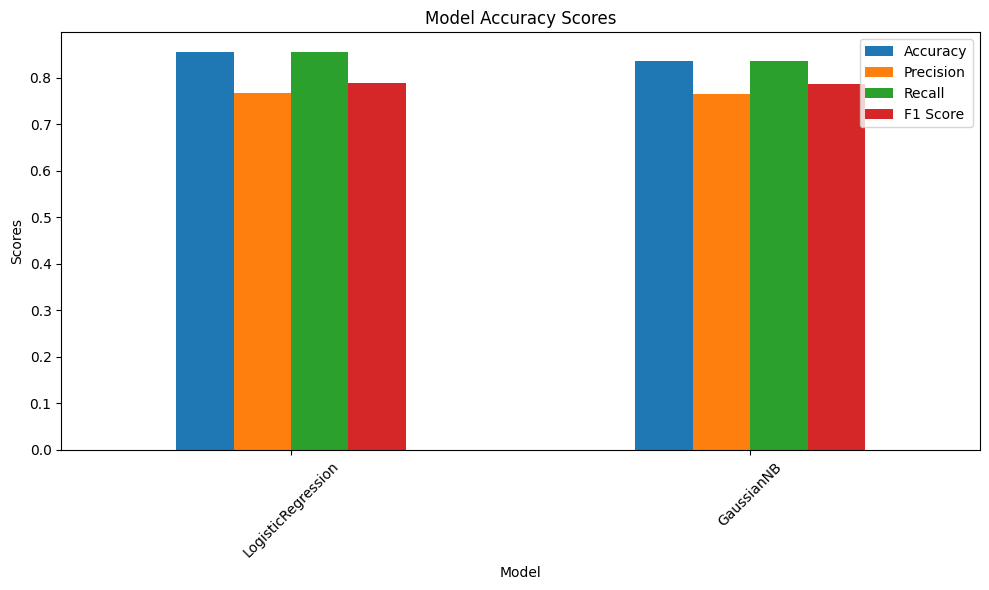

In [ ]:
Model_accuracy.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Model')
plt.ylabel('Scores')
plt.title('Model Accuracy Scores')
plt.xticks(rotation=45)  
plt.legend(loc='upper right')
plt.tight_layout() 
plt.show()

# imbalance Data(SOMTE)


<Axes: title={'center': 'Accident_Severity'}, xlabel='Accident_Severity'>

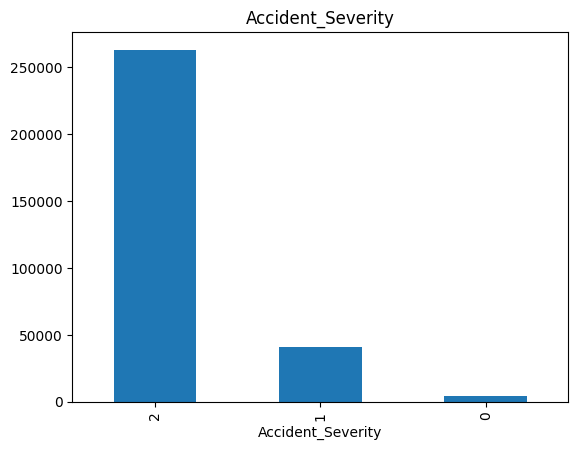

In [ ]:
y.value_counts().plot.bar(title="Accident_Severity")

In [ ]:
print("Accident_Severity        : \n",y.value_counts())
print("\n")
print(y.value_counts(normalize=True))

Accident_Severity        : 
 Accident_Severity
2    263275
1     40740
0      3953
Name: count, dtype: int64


Accident_Severity
2    0.854878
1    0.132286
0    0.012836
Name: proportion, dtype: float64


In [ ]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=42)

In [ ]:
X,y=sm.fit_resample(X,y)

In [ ]:
X.shape

(789825, 19)

In [ ]:
y.shape

(789825,)

In [ ]:
print("Accident_Severity        : \n",y.value_counts())
print("\n")
print(y.value_counts(normalize=True))

Accident_Severity        : 
 Accident_Severity
1    263275
2    263275
0    263275
Name: count, dtype: int64


Accident_Severity
1    0.333333
2    0.333333
0    0.333333
Name: proportion, dtype: float64


<Axes: title={'center': 'Accident_Severity'}, xlabel='Accident_Severity'>

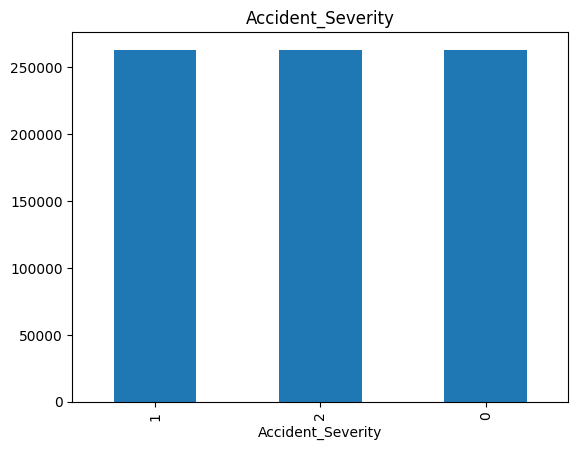

In [ ]:
y.value_counts().plot.bar(title="Accident_Severity")

In [ ]:
X_train, X_test, y_train, y_test =train_test_split(X,y, test_size= 0.20, random_state=100, stratify=y)

# Modeling

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tqdm import tqdm

Modelss = {
    'LogisticRegression': LogisticRegression(),
    'GaussianNB': GaussianNB(),
    #'KNeighborsClassifier': KNeighborsClassifier(),
    #'RandomForestClassifier': RandomForestClassifier(n_estimators=50,max_depth=15,max_samples=0.5,n_jobs=-1,random_state=42),
    #'SVC': SVC(),
    #'DecisionTreeClassifier': DecisionTreeClassifier()
    
}

In [ ]:
ModelName = []
ModelAccuracy = []

for nameModel, model in tqdm(Modelss.items()):
    model.fit(X_train, y_train)
    ModelName.append(nameModel)
    y_pred = model.predict(X_test)
    ModelAccuracy.append([
        accuracy_score(y_test, y_pred),
        precision_score(y_test, y_pred, average='weighted'),
        recall_score(y_test, y_pred, average='weighted'),
        f1_score(y_test, y_pred, average='weighted')
    ])

Model_accuracy = pd.DataFrame(ModelAccuracy, index=ModelName, columns=['Accuracy', 'Precision', 'Recall', 'F1 Score'])
Model_accuracy

  0%|          | 0/2 [00:00<?, ?it/s]c:\Users\OO7\anaconda3\envs\tf_env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
100%|██████████| 2/2 [00:13<00:00,  6.74s/it]


,Accuracy,Precision,Recall,F1 Score
LogisticRegression,0.470813,0.463559,0.470813,0.462578
GaussianNB,0.463660,0.462858,0.463660,0.462963


<Figure size 800x600 with 0 Axes>

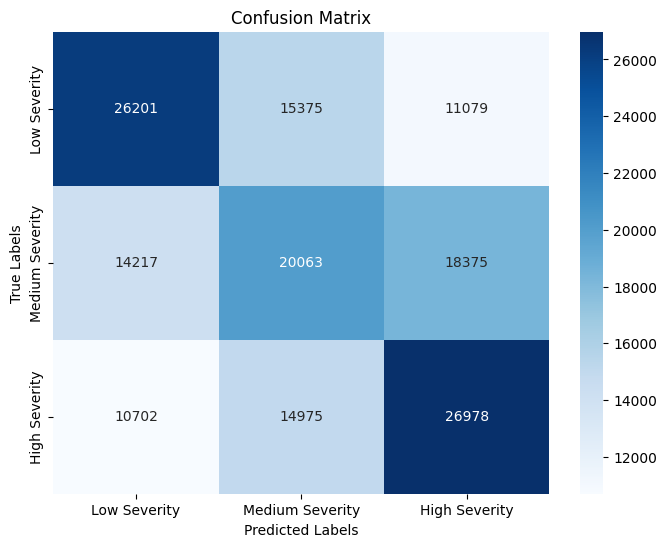

In [ ]:
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
labels = ['Low Severity', 'Medium Severity', 'High Severity']
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# imbalance Data


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# 1. تقسيم البيانات إلى تدريب واختبار (قبل أي موازنة)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. تطبيق SMOTE على بيانات التدريب فقط (لتجنب Data Leakage)
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# 3. تدريب النموذج على البيانات الموزونة
model = LogisticRegression(class_weight='balanced', random_state=42)
model.fit(X_resampled, y_resampled)

# 4. التقييم على بيانات الاختبار (التي لم تُوازَن)
y_pred = model.predict(X_test)

# 5. طباعة النتائج
print("توزيع الفئات قبل SMOTE:", pd.Series(y_train).value_counts())
print("توزيع الفئات بعد SMOTE:", pd.Series(y_resampled).value_counts())
accuracy_score = accuracy_score(y_test, y_pred)
print(f"\nدقة النموذج: {accuracy_score:.2f}")
print("\nتقرير التصنيف:\n", classification_report(y_test, y_pred))
print("\nمصفوفة الارتباك:\n", confusion_matrix(y_test, y_pred))

c:\Users\OO7\anaconda3\envs\tf_env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


توزيع الفئات قبل SMOTE: Accident_Severity
2    210638
0    210632
1    210590
Name: count, dtype: int64
توزيع الفئات بعد SMOTE: Accident_Severity
1    210638
2    210638
0    210638
Name: count, dtype: int64

دقة النموذج: 0.47

تقرير التصنيف:
               precision    recall  f1-score   support

           0       0.50      0.58      0.54     52643
           1       0.41      0.30      0.35     52685
           2       0.48      0.54      0.51     52637

    accuracy                           0.47    157965
   macro avg       0.47      0.47      0.47    157965
weighted avg       0.47      0.47      0.47    157965


مصفوفة الارتباك:
 [[30410 10835 11398]
 [17454 15734 19497]
 [12664 11351 28622]]


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
from sklearn.cluster import KMeans, AgglomerativeClustering
kmeans = KMeans(n_clusters=3, n_init='auto', random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

In [ ]:
acc1 = accuracy_score(y, kmeans_labels)
acc1

TypeError: 'numpy.float64' object is not callable

In [ ]:
acc1 = accuracy_score(y, kmeans_labels)
acc2 = accuracy_score(y, 1 - kmeans_labels)

In [ ]:
kmeans_accuracy = max(acc1, acc2)
print("K-Means Accuracy:", kmeans_accuracy)

K-Means Accuracy: 0.38706294160432253


In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.utils import resample
X_sample, labels_sample = resample(X_scaled, kmeans_labels, n_samples=5000, random_state=42)
score = silhouette_score(X_sample, labels_sample)
print(f"Silhouette Score (sample): {score}")

Silhouette Score (sample): 0.06598215392261361


In [ ]:
print("=== KMeans Results ===")
print("Accuracy:", kmeans_accuracy)
print("Inertia:", kmeans_inertia)
print("Silhouette Score:", kmeans_silhouette)

=== KMeans Results ===
Accuracy: 0.38706294160432253


NameError: name 'kmeans_inertia' is not defined

In [ ]:
from sklearn.cluster import AgglomerativeClustering
hierarchical = AgglomerativeClustering(n_clusters=3)
hierarchical_labels = hierarchical.fit_predict(X_scaled)

In [ ]:
acc1 = accuracy_score(y, hierarchical_labels)
acc1

In [ ]:
acc1 = accuracy_score(y, hierarchical_labels)
acc2 = accuracy_score(y, 1 - hierarchical_labels)

In [ ]:
hierarchical_accuracy = max(acc1, acc2)
print("Hierarchical Clustering Accuracy:", hierarchical_accuracy)

In [ ]:
hierarchical_silhouette = silhouette_score(X_scaled, hierarchical_labels)



In [ ]:
print("\n=== Hierarchical Clustering Results ===")
print("Accuracy:", hierarchical_accuracy)
print("Silhouette Score:", hierarchical_silhouette)


In [ ]:

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis', s=20)
plt.title('KMeans Clustering')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

In [ ]:
hierarchical = AgglomerativeClustering(n_clusters=2)
hierarchical_labels = hierarchical.fit_predict(X_scaled)
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=hierarchical_labels, cmap='plasma', s=20)
plt.title('Hierarchical Clustering')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=kmeans_labels, palette='Set2')
plt.title("K-Means Clustering Visualization")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend(title="Cluster")
plt.show()

In [ ]:

plt.figure(figsize=(12, 6))
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='ward'))
plt.title("Dendrogram (Hierarchical Clustering)")
plt.xlabel("Samples")
plt.ylabel("Euclidean Distance")
plt.axhline(y=200, color='purple', linestyle='--')  
plt.show()
